In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

In [2]:
sns.__version__

'0.11.1'

In [15]:
read_depth=open("exc154_1119115_depth.txt")
depths=[]
for line in read_depth:
    count=line.split('\t')
    if int(count[1])<=19403690 and int(count[1])>=13374434:
        depths.append(int(count[2]))
sorted_depths=np.sort(depths) 

61.496305258784474
55.0


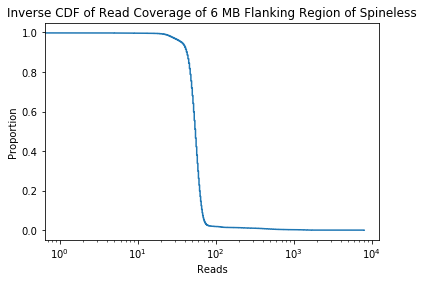

In [19]:
sns.ecdfplot(sorted_depths,complementary=True).set_title('Inverse CDF of Read Coverage of 6 MB Flanking Region of Spineless')
plt.xlabel("Reads")
plt.xscale('log')
print(np.mean(sorted_depths))
print(np.median(sorted_depths))

In [2]:
#vcf analysis 

spineless_start=16372434
spineless_end=16405683
#opens file
vcf=open("exc154_191115_variants.vcf")
variants_dictionary={}
for line in vcf:
    #skips header 
    if '#' in line:
        pass 
    else:
        fields=line.split("\t")
        start=int(fields[1])
        
        if start>=(spineless_start-40000) and start<(spineless_end+40000):
            sequencing_info=fields[9].split(':')
            GQ=int(sequencing_info[3])
            if GQ>40:
                info=fields[7]
                info_fields=info.split(';')
                sv_type=info_fields[1][-3:]
                end=int(info_fields[3][4:])
                CI_start=[int(info_fields[4][6:info_fields[4].index(",")]),int(info_fields[4][info_fields[4].index(",")+1:])]
                CI_end=[int(info_fields[5][6:info_fields[5].index(",")]),int(info_fields[5][info_fields[5].index(",")+1:])]
                SVLEN=int(info_fields[6][6:])
                variants_dictionary[str(start)+"_"+sv_type]={"Start":start, "End":end, "Type":sv_type, "Start Range":[start+CI_start[0],start+CI_start[1]],
                                                            "End Range":[end+CI_end[0],end+CI_end[1]], "Length": SVLEN, "Quality":GQ }


In [3]:
v_pd=pd.DataFrame.from_dict(variants_dictionary, orient="index")
v_pd.to_csv("exc154_ss_variants.csv")